# Day 4th - calculation of statistical errors

## Point 1

**Block analysis** (Flyvbjerg, Petersen; JCP 1989) is a method used to correctly estimate the error on the mean in the case of correlated time series.

Recompute the average potential energies (column 3) as done in day 2, together with the corresponding error on the mean estimated by the standard deviation (divided by square root of n. of samples). Remember to discard initial steps due to equilibration.

Then, write an algorithm to perform block analysis  and use it to correctly estimate the error on the mean. Does this estimate agree with the one determined at previous point?

Repeat for random white noise. What is the result of block analysis? Does it agree with the error on the mean estimated by the standard deviation?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ene = {}
Ts = np.around(np.linspace(0.1, 3, 30), decimals=1)

for temp in Ts:
    # ene[temp] = np.loadtxt("Results/energiesT%.1f.dat" % temp)[1000:, 3][::10]
    ene[temp] = np.loadtxt('Energies/potential_energy_%.1f' % temp)[1000:]#[::10]

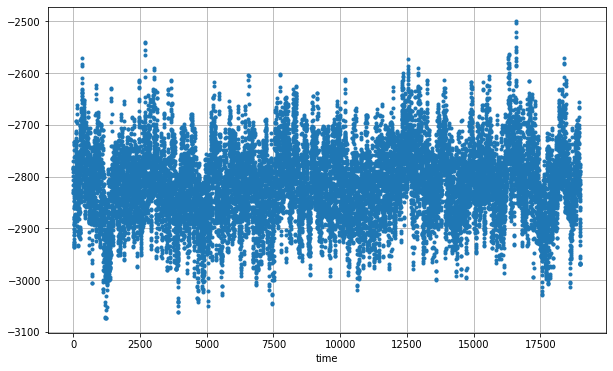

mean:  -2814.035727952526
std (on the mean):  [0.52499293]


In [3]:
temp = 3.0 # for example
energies = ene[temp]

plt.figure(figsize=(10, 6))
plt.plot(energies, '.')
plt.xlabel('time')
plt.grid()
plt.show()

size = np.shape(energies)
mean = np.mean(energies)
std = np.std(energies)

print('mean: ', mean)
print('std (on the mean): ', std/np.sqrt(size))

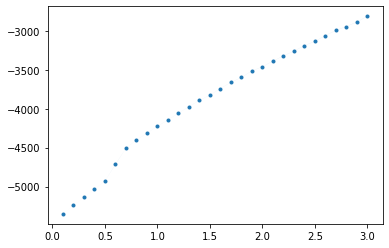

In [4]:
avs = []
stds = []

for temp in Ts:
    avs.append(np.mean(ene[temp]))
    stds.append(np.std(ene[temp])/np.sqrt(len(ene[temp])))

avs = np.array(avs)
stds = np.array(stds)

plt.plot(Ts, avs, '.')
plt.fill_between(Ts, avs - stds, avs + stds, alpha=0.5)

Due to correlations, the standard deviation (divided by the square root of n. of points in the sample) underestimates the uncertainty on the mean. In these cases, we should perform block analysis.

- Write an algorithm that perform block analysis.

In [5]:
def block_analysis(x, size_blocks=None):
    
    size = len(x)
    mean = np.mean(x)
    std = np.std(x)/np.sqrt(size)

    delta = 1
    if size_blocks is None:
        size_blocks = np.arange(1, np.int64(size/2) + delta, delta)

    n_blocks = []
    epsilon = []

    for size_block in size_blocks:
        n_block = int(size/size_block)
        
        # a = 0 
        # for i in range(n_block):
        #     a += (np.mean(x[(size_block*i):(size_block*(i+1))]))**2
        # 
        # epsilon.append(np.sqrt((a/n_blocks[-1] - mean**2)/n_blocks[-1]))

        block_averages = []
        for i in range(n_block):
            block_averages.append(np.mean(x[(size_block*i):(size_block*(i+1))]))
        block_averages = np.array(block_averages)

        n_blocks.append(n_block)
        epsilon.append(np.sqrt((np.mean(block_averages**2)-np.mean(block_averages)**2)/n_block))
    
    return mean, std, epsilon, n_blocks, size_blocks

In [6]:
mean, std, epsilon, n_blocks, size_blocks = block_analysis(energies)

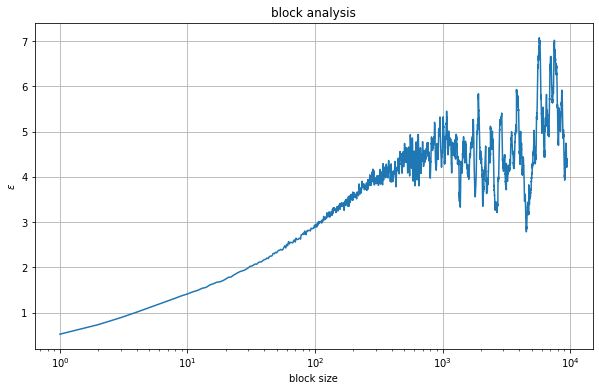

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(size_blocks, epsilon, '-')
plt.title('block analysis')
plt.xlabel('block size')
plt.ylabel('$\epsilon$')
plt.xscale('log')
# plt.yscale('log')
plt.grid()

Comments:
- when the block size is 1, we go back to standard deviation on the mean, which underestimates the actual error;
- then, increasing the block size the error on the mean increases, up to a platau region when it stabilizes (around 100);
- finally, the block size is increased too much and the n. of blocks is too small to have a statistical significative estimate of the error.

Let's take the error corresponding at block size around 100.

In [8]:
size_block = 1000

In [9]:
index = np.argwhere(size_blocks == size_block)[0][0]
error = epsilon[index]

print('Standard deviation on the mean: ', std)
print('Correct estimate of the error on the mean: ', error)

Standard deviation on the mean:  0.5249929268085745
Correct estimate of the error on the mean:  4.592052466571453


Use this value of the block size for all the temperatures.

In [10]:
means = []
stds = []
epsilons = []

for temp in Ts:

    x = ene[temp]
    out = block_analysis(x, [size_block])

    means.append(out[0])
    stds.append(out[1])
    epsilons.append(out[2][0])

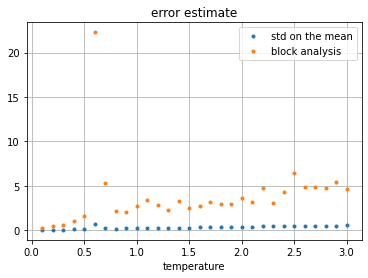

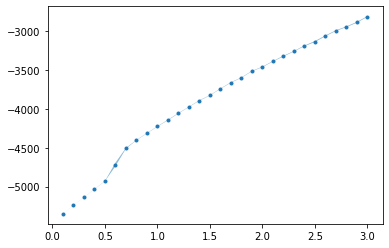

In [12]:
plt.figure()

plt.plot(Ts, stds, '.', label='std on the mean')
plt.plot(Ts, epsilons, '.', label='block analysis')

plt.xlabel('temperature')
plt.title('error estimate')
plt.legend()
plt.grid()

plt.figure()
plt.plot(Ts, avs, '.')
# plt.fill_between(Ts, avs - stds, avs + stds, alpha=0.5)
plt.fill_between(Ts, avs - epsilons, avs + epsilons, alpha=0.5)

You can also repeat block analysis for each temperature.

In [12]:
means = []
stds = []
epsilons = []

for temp in Ts:

    x = ene[temp]
    out = block_analysis(x, size_blocks)

    means.append(out[0])
    stds.append(out[1])
    epsilons.append(out[2])

KeyboardInterrupt: 

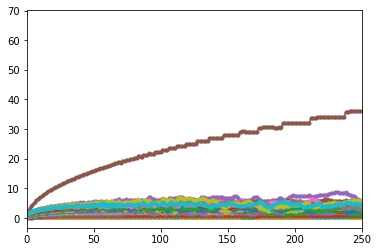

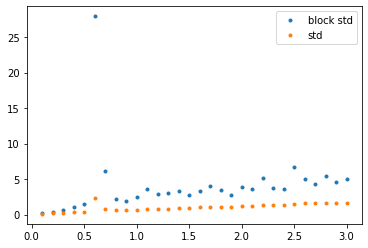

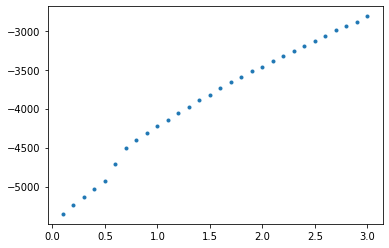

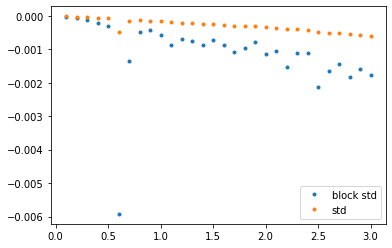

In [12]:
for i, temp in enumerate(ene.keys()):
    plt.plot(size_blocks, epsilons[i], '.-', label=temp)

plt.xlim([0,250])
# plt.legend()

plt.figure()
plt.plot(ene.keys(), [epsilons[i][150] for i in range(len(ene.keys()))], '.', label='block std')
plt.plot(ene.keys(), stds, '.', label='std')
plt.legend()

plt.figure()
plt.plot(ene.keys(), means, '.', label='mean')

plt.figure()
plt.plot(ene.keys(), np.array([epsilons[i][150] for i in range(len(ene.keys()))])/np.array(means), '.', label='block std')
plt.plot(ene.keys(), np.array(stds)/np.array(means), '.', label='std')
plt.legend()

Compare with white noise (uncorrelated)

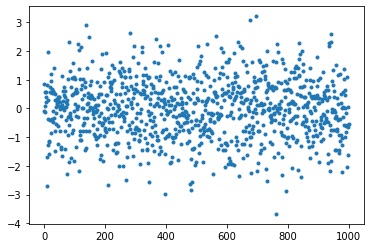

In [21]:
N = 1000
std = 1.0

white_noise = np.random.normal(scale=std, size=N) # by default, average 0 and std (scale) 1

plt.plot(white_noise, '.')
plt.show()

In [22]:
mean, std_onmean, epsilon, n_blocks, size_blocks = block_analysis(white_noise)

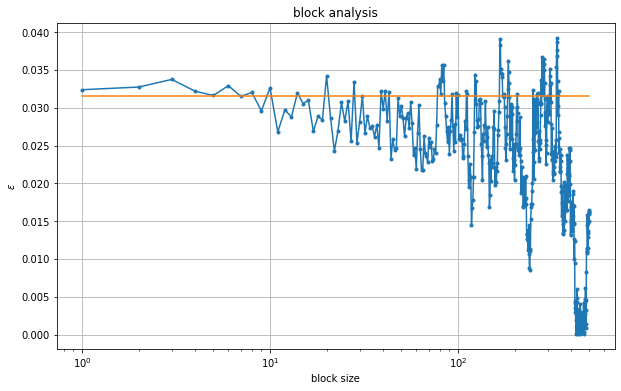

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(size_blocks, epsilon, '.-')
plt.plot([size_blocks[0], size_blocks[-1]], [std/np.sqrt(N), std/np.sqrt(N)], '-')
plt.title('block analysis')
plt.xlabel('block size')
plt.ylabel('$\epsilon$')
plt.xscale('log')
plt.grid()

## Point 2

**Bootstrap** (Efron, 1979) is a procedure to compute properties of an estimator by random re-sampling with replacement from the data. It is very simple and consists in the following steps:
- sample $n$ observations (same n. as the data size) with replacement from your data;
- compute the estimator;
- repeat.

Write an algorithm to perform boostrap on blocks (namely, split your time series into blocks and sample them with replacement). Use it to compute the error on the mean of the potential energy, as done in the previous point. Does the two estimates agree with each other?

Now, use your algorithm to compute the statistical error on the heat capacity, computed from fluctuations of the potential energy. Notice you can also estimate the error on the standard deviation, rather than on the variance of the potential energy: which is the relationship between the two?

Compare with the calculation of the heat capacity given by the derivative of the energy with respect to the temperature, approximated through finite difference. In this case, how do you estimate the associated error? Do the two estimates of the heat capacity agree with each other?

What happens if you neglected to remove initial equilibration steps?

What happens if you compare the hysteresis cycle?

In [5]:
def bootstrap_on_blocks(x, n_block=10, n_repetitions=100, func='mean'):

    size_block = np.int64(len(x)/n_block)
    upto = n_block*size_block

    x_reshaped = np.reshape(x[:upto], (n_block, size_block))

    observables = []

    for i in range(n_repetitions):

        blocks_chosen = np.random.randint(n_block, size=n_block)
        traj = np.concatenate(x_reshaped[blocks_chosen])
        
        if func == 'mean':
            observables.append(np.mean(traj))
        else:
            observables.append(func(traj))

    mean = np.mean(observables)
    error = np.std(observables)

    return observables, mean, error

In [6]:
Ts = np.array(list(ene.keys()))

In [7]:
n_block = np.int64(len(energies)/size_block)

observables, mean, error = bootstrap_on_blocks(energies, n_block=n_block, func='mean')

NameError: name 'size_block' is not defined

-2813.4664983373395 4.5220755586714985


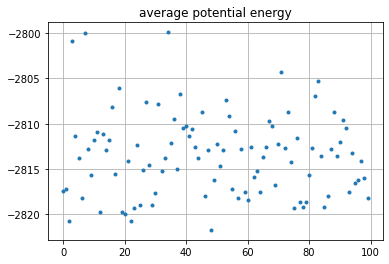

In [17]:
plt.plot(observables, '.')

plt.title('average potential energy')
plt.grid()

print(mean, error)

In [18]:
observables_list = []
mean_list = []
error_list = []

for temp in Ts:
    energies = ene[temp]
    out = bootstrap_on_blocks(energies, n_block=20, func='mean', n_repetitions=500)

    observables_list.append(out[0])
    mean_list.append(out[1])
    error_list.append(out[2])

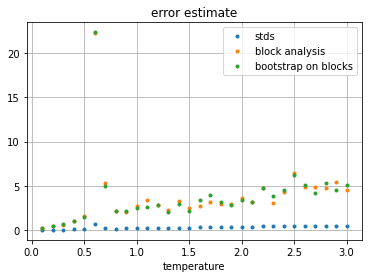

In [19]:
plt.plot(Ts, stds, '.', label='stds')
plt.plot(Ts, epsilons, '.', label='block analysis')
plt.plot(Ts, error_list, '.', label='bootstrap on blocks')

plt.legend()
plt.grid()
plt.title('error estimate')
plt.xlabel('temperature')
plt.show()

Now, set a value of temperature and repeat bootstrap on blocks by varying the n. of blocks, as done for block analysis. Compare the two results.

In [69]:
size = len(x)

delta = 1
size_blocks = np.arange(1, np.int64(size/2) + delta, delta)

n_blocks = np.int64(size/size_blocks)

means = []
errors = []

for n_block in n_blocks:
    out = bootstrap_on_blocks(energies, n_block=n_block, func='mean')
    means.append(out[1])
    errors.append(out[2])

KeyboardInterrupt: 

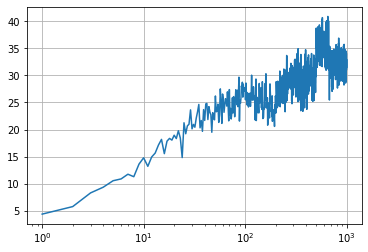

In [20]:
plt.plot(size_blocks, errors, '-')
plt.xscale('log')
plt.grid()

Finally, compute the error on the heat capacity

In [20]:
func = lambda x: np.std(x)**2

5199.0730512760565 215.58658736180115


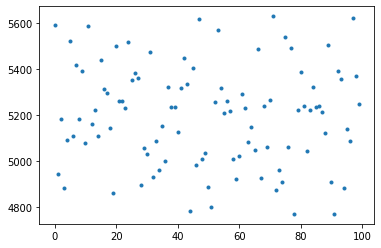

In [21]:
observables, mean, error = bootstrap_on_blocks(ene[temp], n_block=10, func=func)

plt.plot(observables, '.')

print(mean, error)

In [22]:
means = []
errors = []

for temp in Ts:
    out = bootstrap_on_blocks(ene[temp], n_block=10, func=func)
    means.append(out[1]/temp**2)
    errors.append(out[2]/temp**2)

means = np.array(means)
errors = np.array(errors)

In [26]:
epsilon_sum = []

for i in range(len(epsilons)-1):
    epsilon_sum.append((epsilons[i]**2 + epsilons[i + 1]**2)/Ts[i])

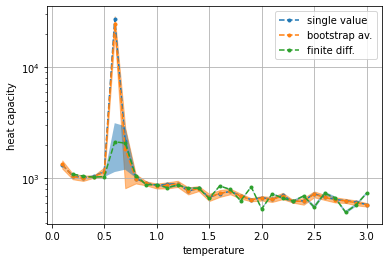

In [29]:
energy_var = []
energy_mean = []

for temp in Ts:
    energy_var.append(np.std(ene[temp])**2)
    energy_mean.append(np.mean(ene[temp]))

Cv = energy_var/Ts**2
plt.plot(Ts, Cv, '.--', label='single value')

plt.plot(Ts, means, '.--', label='bootstrap av.')

plt.fill_between(Ts, means - errors, means + errors, alpha=0.5, color='tab:orange')

Cv_findiff = np.ediff1d(energy_mean)/np.ediff1d(Ts)
plt.plot(Ts[1:], Cv_findiff, '.--', label='finite diff.')
plt.fill_between(Ts[1:], Cv_findiff - epsilon_sum, Cv_findiff + epsilon_sum, alpha=0.5)

plt.xlabel('temperature')
plt.ylabel('heat capacity')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (34,) and (30,)

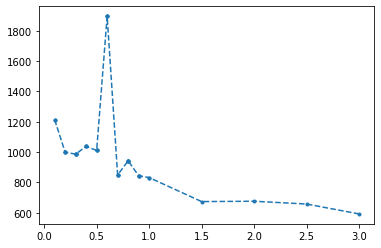

In [43]:
energy_var = []
energy_mean = []

for temp in Ts:
    energy_var.append(np.std(ene[temp])**2)
    energy_mean.append(np.mean(ene[temp]))

Cv = energy_var/Ts**2
plt.plot(Ts, Cv, '.--', label='single value')

plt.plot(Ts, means, '.--', label='bootstrap av.')

plt.fill_between(Ts, means - errors, means + errors, alpha=0.5, color='tab:orange')

Cv_findiff = np.ediff1d(energy_mean)/np.ediff1d(Ts)
plt.plot(Ts[1:], Cv_findiff, '.--', label='finite diff.')
plt.fill_between(Ts[1:], Cv_findiff - epsilon_sum, Cv_findiff + epsilon_sum, alpha=0.5)

plt.xlabel('temperature')
plt.ylabel('heat capacity')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

compare std $\sigma$ with variance $\sigma^2$: the error on the variance is not the squared of the error on the std $\delta\sigma^2 = (\delta\sigma)^2$, rather it can be estimated (perturbatively, at 1st order) through error propagation as
\begin{equation}
\delta (x^2) = \Bigl|\frac{dx^2}{dx} \delta x \Bigr| = 2x\delta x \simeq 2\mu\sigma
\end{equation}

In [30]:
func = lambda x: np.std(x)

observables, mean_std, error_std = bootstrap_on_blocks(energies, n_block=20, func=func)

In [31]:
mean_std, error_std

(72.19123363643243, 1.7088383975551025)

In [32]:
func = lambda x: np.std(x)**2

observables, mean_var, error_var = bootstrap_on_blocks(energies, n_block=20, func=func)

In [33]:
mean_var, error_var

(5160.756692668614, 239.0013302551692)

In [34]:
estimate = 2*mean_std*error_std

print(str(estimate) + ' is a good proxy for ' + str(error_var))

246.7263040096144 is a good proxy for 239.0013302551692


In [40]:
ene_back = {}
Ts_back = np.array(list(np.around(np.linspace(0.1, 1, 30), decimals=1)) + [1.5, 2.0, 2.5, 3.0])

for temp in Ts_back:
    # ene[temp] = np.loadtxt("Results/energiesT%.1f.dat" % temp)[1000:, 3][::10]
    ene_back[temp] = np.loadtxt('Energies/potential_energy_back_%.1f' % temp)[1000:]#[::10]

In [41]:
means_back = []
errors_back = []

for temp in Ts:
    out = bootstrap_on_blocks(ene[temp], n_block=10, func=func)
    means_back.append(out[1]/temp**2)
    errors_back.append(out[2]/temp**2)

means_back = np.array(means)
errors_back = np.array(errors)

In [42]:
energy_back_var = []
energy_back_mean = []

for temp in Ts_back:
    energy_back_var.append(np.std(ene_back[temp])**2)
    energy_back_mean.append(np.mean(ene_back[temp]))

Cv = energy_var/Ts**2
plt.plot(Ts, Cv, '.--', label='single value')

plt.plot(Ts, means, '.--', label='bootstrap av.')

plt.fill_between(Ts, means - errors, means + errors, alpha=0.5, color='tab:orange')

Cv_findiff = np.ediff1d(energy_mean)/np.ediff1d(Ts)
plt.plot(Ts[1:], Cv_findiff, '.--', label='finite diff.')
plt.fill_between(Ts[1:], Cv_findiff - epsilon_sum, Cv_findiff + epsilon_sum, alpha=0.5)

# back
Cv_back = energy_back_var/Ts_back**2
plt.plot(Ts_back, Cv_back, '.--', label='single value')

plt.plot(Ts_back, means_back, '.--', label='bootstrap av.')

plt.fill_between(Ts_back, means_back - errors_back, means_back + errors_back, alpha=0.5, color='tab:orange')

Cv_back_findiff = np.ediff1d(energy_back_mean)/np.ediff1d(Ts_back)
plt.plot(Ts_back[1:], Cv_back_findiff, '.--', label='finite diff.')
# plt.fill_between(Ts[1:], Cv_findiff - epsilon_sum, Cv_findiff + epsilon_sum, alpha=0.5)

plt.xlabel('temperature')
plt.ylabel('heat capacity')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (30,) (34,) 